In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
cars = pd.read_csv("C:/Users/physi/Desktop/EN.705.603_Creating_AI_EnabledSystems/Mod9/cars.csv")

In [3]:
cars.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [4]:
# bool to int for the list column below

bolMap = {False:0, True:1}
cars['engine_has_gas']= cars['engine_has_gas'].map(bolMap)
cars['has_warranty']= cars['has_warranty'].map(bolMap)
cars['is_exchangeable']=cars['is_exchangeable'].map(bolMap)
cars['feature_0']=cars['feature_0'].map(bolMap)
cars['feature_1']=cars['feature_1'].map(bolMap)
cars['feature_2']=cars['feature_2'].map(bolMap)
cars['feature_3']=cars['feature_3'].map(bolMap)
cars['feature_4']=cars['feature_4'].map(bolMap)
cars['feature_5']=cars['feature_5'].map(bolMap)
cars['feature_6']=cars['feature_6'].map(bolMap)
cars['feature_7']=cars['feature_7'].map(bolMap)
cars['feature_8']=cars['feature_8'].map(bolMap)
cars['feature_9']=cars['feature_9'].map(bolMap)


In [5]:
# fill engine_capacity with colmn mean

cars["engine_capacity"].fillna(cars.mean()[3], inplace =True)

In [6]:
# get dummies for the rest of the object columns 
# drop the first column of each new category to limit linear dependence

cars = pd.get_dummies(cars, drop_first = True)

In [7]:
#all columns converted
#30features -> 1230 features

cars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Columns: 1230 entries, odometer_value to location_region_Могилевская обл.
dtypes: float64(2), int64(18), uint8(1210)
memory usage: 50.3 MB


In [8]:
cars.head()

,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,price_usd,is_exchangeable,number_of_photos,up_counter,feature_0,...,body_type_van,state_new,state_owned,drivetrain_front,drivetrain_rear,location_region_Витебская обл.,location_region_Гомельская обл.,location_region_Гродненская обл.,location_region_Минская обл.,location_region_Могилевская обл.
0,190000,2010,0,2.5,0,10900.00,0,9,13,0,...,0,0,1,0,0,0,0,0,1,0
1,290000,2002,0,3.0,0,5000.00,1,12,54,0,...,0,0,1,0,0,0,0,0,1,0
2,402000,2001,0,2.5,0,2800.00,1,4,72,0,...,0,0,1,0,0,0,0,0,1,0
3,10000,1999,0,3.0,0,9999.00,1,9,42,1,...,0,0,1,0,0,0,0,0,1,0
4,280000,2001,0,2.5,0,2134.11,1,14,7,0,...,0,0,1,0,0,0,1,0,0,0


In [9]:
sc = StandardScaler()
cars = pd.DataFrame(data= sc.fit_transform(cars))

In [10]:
# Cluster with all features

In [11]:
cars.head()

,0,1,2,3,4,5,6,7,8,9,...,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229
0,-0.432604,0.874857,-0.190329,0.662868,-0.108583,0.662723,-0.737996,-0.106523,-0.076377,-0.544288,...,-0.146353,-0.10723,0.146353,-1.603947,-0.403632,-0.290942,-0.297864,-0.262564,0.768257,-0.273302
1,0.302309,-0.117007,-0.190329,1.407934,-0.108583,-0.255127,1.355021,0.385834,0.870803,-0.544288,...,-0.146353,-0.10723,0.146353,-1.603947,-0.403632,-0.290942,-0.297864,-0.262564,0.768257,-0.273302
2,1.125411,-0.240990,-0.190329,0.662868,-0.108583,-0.597376,1.355021,-0.927119,1.286638,-0.544288,...,-0.146353,-0.10723,0.146353,-1.603947,-0.403632,-0.290942,-0.297864,-0.262564,0.768257,-0.273302
3,-1.755446,-0.488956,-0.190329,1.407934,-0.108583,0.522556,1.355021,-0.106523,0.593580,1.837264,...,-0.146353,-0.10723,0.146353,-1.603947,-0.403632,-0.290942,-0.297864,-0.262564,0.768257,-0.273302
4,0.228818,-0.240990,-0.190329,0.662868,-0.108583,-0.700967,1.355021,0.714072,-0.214989,-0.544288,...,-0.146353,-0.10723,0.146353,-1.603947,-0.403632,-0.290942,3.357234,-0.262564,-1.301648,-0.273302


In [12]:
# n = 2 clusters

km = KMeans(n_clusters=2)
yclass=km.fit_predict(cars)
print("classes " , yclass)
print("Sum of square distances to cluster center " ,km.inertia_)


classes  [0 0 0 ... 0 1 1]
Sum of square distances to cluster center  47177957.21089922


In [13]:
# n= 3clusters

km = KMeans(n_clusters=3)
yclass=km.fit_predict(cars)
print("classes " , yclass)
print("Sum of square distances to cluster center " ,km.inertia_)

classes  [1 1 1 ... 1 0 0]
Sum of square distances to cluster center  47136635.264740795


In [14]:
km = KMeans(n_clusters=4)
yclass=km.fit_predict(cars)
print("classes " , yclass)
print("Sum of square distances to cluster center " ,km.inertia_)

classes  [2 2 2 ... 2 2 2]
Sum of square distances to cluster center  47201432.24389351


In [15]:
km = KMeans(n_clusters=5)
yclass=km.fit_predict(cars)
print("classes " , yclass)
print("Sum of square distances to cluster center " ,km.inertia_)

classes  [2 2 2 ... 2 3 3]
Sum of square distances to cluster center  46994618.43747506


In [16]:
# cluster just prices

In [17]:
km1 = KMeans(n_clusters=2)
yclass1=km1.fit_predict(cars.iloc[:,[0,5]])
print("classes " , yclass1)
print("Sum of square distances to cluster center " ,km.inertia_)

classes  [0 1 1 ... 1 0 1]
Sum of square distances to cluster center  46994618.43747506


In [18]:
km2 = KMeans(n_clusters=3)
yclass2=km2.fit_predict(cars.iloc[:,[0,5]])
print("classes " , yclass2)
print("Sum of square distances to cluster center " ,km.inertia_)

classes  [2 1 1 ... 1 2 1]
Sum of square distances to cluster center  46994618.43747506


In [19]:
km3 = KMeans(n_clusters=5)
yclass3=km3.fit_predict(cars.iloc[:,[0,5]])
print("classes " , yclass3)
print("Sum of square distances to cluster center " ,km.inertia_)

classes  [1 3 3 ... 4 0 3]
Sum of square distances to cluster center  46994618.43747506


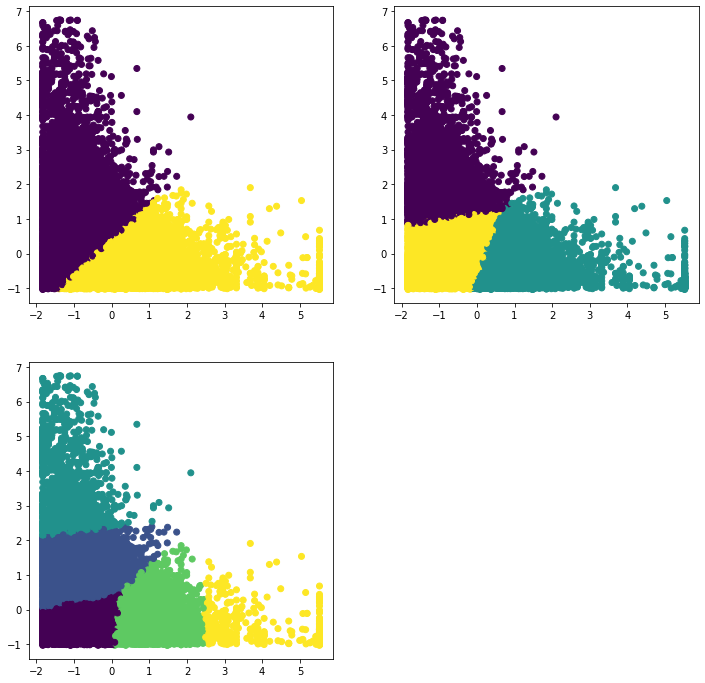

In [20]:
#Describe any insights on the used car market from the clustering experiments.

# Looking at the data a subset of the cars data (X = miles, Y =price) for 2, 3, 5 clusters, it seems multiple clusters 
#form around the low price/low mileage market


plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(cars.iloc[:, 0], cars.iloc[:, 5], c=yclass1)

plt.subplot(222)
plt.scatter(cars.iloc[:, 0], cars.iloc[:, 5], c=yclass2)

plt.subplot(223)
plt.scatter(cars.iloc[:, 0], cars.iloc[:, 5], c=yclass3)
plt.show()